# Project -- AIR FRANCE INTERNET MARKETING 

### This project will analyze the data that comes with the Air France case, interpret the results,and make recommendation from the Case: Air France Internet Marketing: Optimizing Google, Yahoo!, MSN, and Kayak Sponsored Search

In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols

### Load AirFrance Internet Marketing data into a dataframe

In [2]:
AirFrance_df = pd.read_excel('AirFranceInternetMarketing.xlsx')

In [3]:
# Checking the columns for our datafarme
AirFrance_df.columns.values

array(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword',
       'Match Type', 'Campaign', 'Keyword Group', 'Category',
       'Bid Strategy', 'Keyword Type', 'Status', 'Search Engine Bid',
       'Clicks', 'Click Charges', 'Avg. Cost per Click', 'Impressions',
       'Engine Click Thru %', 'Avg. Pos.', 'Trans. Conv. %',
       'Total Cost/ Trans.', 'Amount', 'Total Cost',
       'Total Volume of Bookings'], dtype=object)

In [4]:
print (AirFrance_df.shape)

(4510, 23)


In [5]:
AirFrance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 23 columns):
Publisher ID                4510 non-null object
Publisher Name              4510 non-null object
Keyword ID                  4510 non-null int64
Keyword                     4510 non-null object
Match Type                  4462 non-null object
Campaign                    4510 non-null object
Keyword Group               4510 non-null object
Category                    4510 non-null object
Bid Strategy                3286 non-null object
Keyword Type                4510 non-null object
Status                      4510 non-null object
Search Engine Bid           4510 non-null float64
Clicks                      4510 non-null int64
Click Charges               4510 non-null float64
Avg. Cost per Click         4510 non-null float64
Impressions                 4510 non-null int64
Engine Click Thru %         4510 non-null float64
Avg. Pos.                   4510 non-null float64
Trans. Co

In [6]:
AirFrance_df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


## 1.Please add four additional metrics into your data using the formula provided 


### a) Net Revenue (Amount (total revenue) – Total Cost))

In [7]:
AirFrance_df['Net Revenue'] = ( AirFrance_df['Amount'] - AirFrance_df['Total Cost'])

### b) Return on Ad Spent (ROA) (Net Revenue / Total Cost) (Note: Set this variable as percentage; if Total Cost is 0, then set ROA as 0 for that observation.)

In [8]:
AirFrance_df['ROA'] = (AirFrance_df['Net Revenue']/AirFrance_df['Total Cost'])
AirFrance_df['ROA'] = AirFrance_df['ROA'].replace([np.inf, -np.inf], 0) * 100

### c)  Average Revenue per Booking (Amount /Total Volume of Bookings) (Note: if Total Volume of Bookings is 0, then set null value for that observation)

In [9]:
AirFrance_df['Average Revenue per Booking'] = np.where (AirFrance_df['Total Volume of Bookings'] ==0 ,np.nan, AirFrance_df['Amount']/AirFrance_df['Total Volume of Bookings'])


### d)  Probability of Booking (Engine Click Thru % (CTR) * Trans. Conv. % (TCR) / 10000)

In [10]:
AirFrance_df['Probability of Booking'] = (AirFrance_df['Engine Click Thru %']*AirFrance_df['Trans. Conv. %']/10000)

In [11]:
AirFrance_df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,975.327778,0.818182
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,1574.200000,0.166667
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,100583.870968,390.150000,0.111111
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,832.575000,0.004988
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,42400.000000,935.000000,0.003145


In [12]:
AirFrance_df.columns.values

array(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword',
       'Match Type', 'Campaign', 'Keyword Group', 'Category',
       'Bid Strategy', 'Keyword Type', 'Status', 'Search Engine Bid',
       'Clicks', 'Click Charges', 'Avg. Cost per Click', 'Impressions',
       'Engine Click Thru %', 'Avg. Pos.', 'Trans. Conv. %',
       'Total Cost/ Trans.', 'Amount', 'Total Cost',
       'Total Volume of Bookings', 'Net Revenue', 'ROA',
       'Average Revenue per Booking', 'Probability of Booking'],
      dtype=object)

In [13]:
## Importing my datafarme to excel file to cross validate the above Coloumns created 
#df2 = AirFrance_df.copy()
#with pd.ExcelWriter('ExcelAirFrance.xlsx') as writer:  
    #AirFrance_df.to_excel(writer, sheet_name='Sheet_name_1')
    #df2.to_excel(writer, sheet_name='Sheet_name_2')

### Please provide descriptive statistics (Count, Max, Min, Mean, and Std.) for variables (CTR, TCR, Net Revenue, Avg. Cost per Click, ROA, Average Revenue per Booking, Probability of Booking). Please report a summary statistics table and provide short descriptions of your observations and thoughts.

In [14]:
AirFrance_df[['Engine Click Thru %','Trans. Conv. %','Net Revenue','Avg. Cost per Click','ROA','Average Revenue per Booking','Probability of Booking']].agg(['count','max','min','mean','std'])

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,ROA,Average Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
max,200.000000,900.000000,549524.050273,10.000000,379487.027027,5877.750000,0.818182
min,0.000000,0.000000,-8725.924987,0.000000,-100.000000,34.000000,0.000000
mean,11.141451,0.569255,866.207678,1.890240,341.413864,1024.259502,0.000681
std,20.234582,13.862485,14246.298903,1.322375,7277.915278,704.318741,0.015151


### Observation: 

•	The above summary table is showing the summary statistics (N, Max, Min, Mean, and Std.) for variables: Engine Click Thru %, Trans. Conv. %, Net Revenue, Avg. Cost per Click, ROA, Average Revenue per Booking, Probability of Booking.

•	The count indicates the number of observations in the AirFrance_df dataset. Here, total of 4510 observation are available.

•	The average of all variables is shown as the mean in the below table.

•	The standard deviation shows how the numbers are spread out from the mean (average) value. Here, Probability of Booking have low standard deviation, Hence the data is closer to the mean value. 

•	Engine Click Thru % --Its ratio showing how often people who see your ad end up clicking it, the mean value for Engine Click Thru % is 11.14 which is a good indication that users find your ads helpful and relevant. 

•	Trans. Conv. % -- The transaction conversion rate shows that how manu clicks were converted into transactions. The mean Trans. Conv. % is 0.57 which is low.

•	Net Revenue -- The maximum amount of net revenue is 549524 and the minimum amount of net revenue is -8725.9 Net revenue is obtained by total revenue minus cost incurred. 

•	Avg. Cost per Click -- It is calculated by dividing the total cost to an advitiser by the total number of clicks, it’s the amount that a website publisher receives when a paid advertisement on the site is clicked. Here the mean of Avg cost per click is 1.89$ and Maximum cost is 10$. 

•	ROA for return on ad spend. It's a calculation that divides the amount of revenue generated from ads by the amount spent on advertising. The goal of measuring ROA is to determine if the cost of advertising yields an acceptable amount of incoming business revenue. So, we have average ROA as 341% which is good.

•	Average Revenue per Booking -- It is calculated by dividing the Amount by Total Volume of Bookings which is the revenue received for every booking. The mean value for this 83.57 

•	Probability of Booking --This shows the actual number of transactions took place after the views on the ad. Probability of Booking can be calculated by dividing the Engine Click Thru % Trans. Conv. %. The average value shows 0.000681 which is very low.


### e)  Please make a Histogram for any of the variables of your own interests in the data. Then report any insights you may be able draw from the charts.

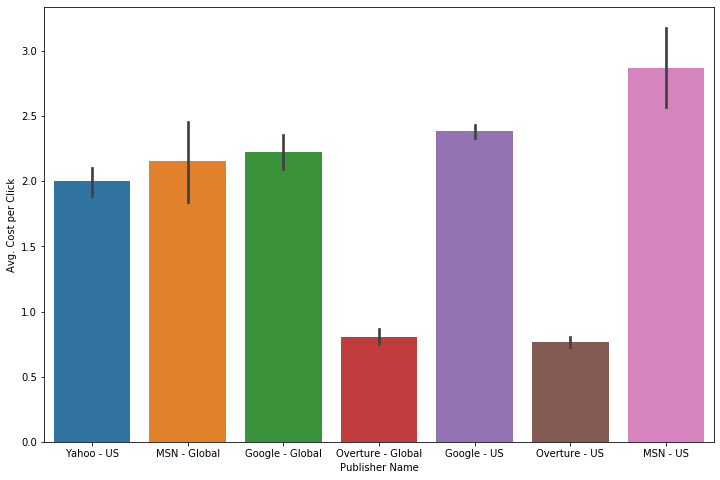

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(AirFrance_df["Publisher Name"],y= AirFrance_df["Avg. Cost per Click"])

### •  Average Cost per Click (CPC) is based on actual cost-per-click (actual CPC), which is the actual amount you're charged for a click on your ad.

### •  The above plot shows that which publisher charged more for Average Cost per Click, we can see that MSN-US charges the most and Overture-US charges the least.

In [16]:
AirFrance_df.groupby(["Campaign"])["Keyword"].value_counts().sort_values(ascending=False)

Campaign                                Keyword                                           
Air France Brand & French Destinations  flight to paris                                       5
Air France Branded                      airfrance                                             4
Air France Brand & French Destinations  paris airports                                        3
                                        paris france airport                                  3
                                        paris flights                                         3
                                        paris flight                                          3
                                        paris fares                                           3
                                        paris cheap tickets                                   3
                                        paris cheap flights                                   3
                                        paris

### •   From the above frequency count of keywords in a Campaign , we an infer that by removing low frequency keywords from campaign, can increase the overall value of search engine marketing.                    

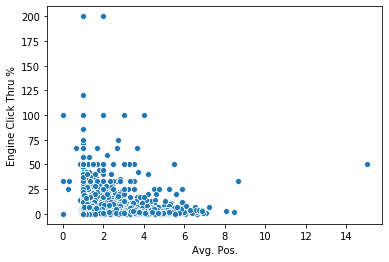

In [17]:
sns.scatterplot(x=AirFrance_df["Avg. Pos."],y=AirFrance_df["Engine Click Thru %"])

### •	Average position is a statistic that describes how your ad typically ranks against other ads. This rank determines in which order ads appear on the page. Positions 1-8 generally appear on the first page while 9-16 on the second.
### •	From the above scatterplot, we can interfer that as Average position value increases, the engine click thru % will decrease. 

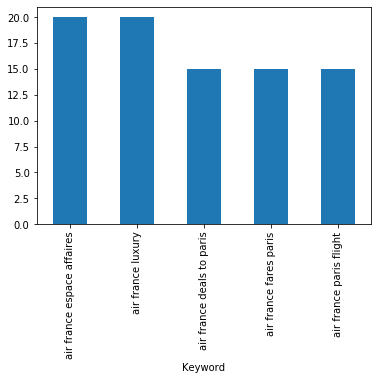

In [18]:
AirFrance_df.groupby(["Keyword"])["Search Engine Bid"].mean().sort_values(ascending=False)[:5].plot.bar()

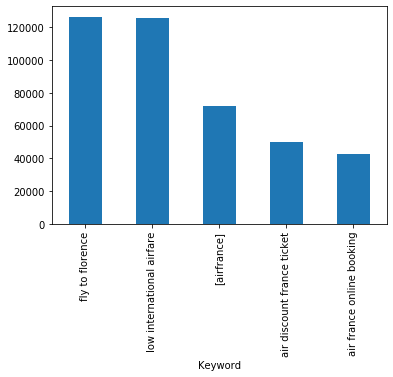

In [19]:
AirFrance_df.groupby(["Keyword"])["ROA"].mean().sort_values(ascending=False)[:5].plot.bar()

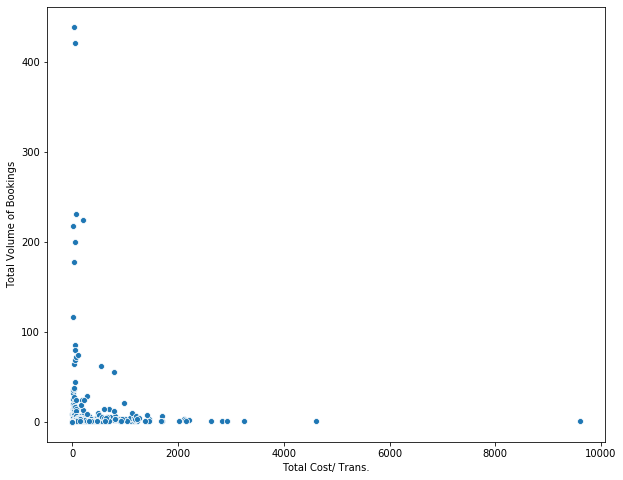

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=AirFrance_df["Total Cost/ Trans."],y=AirFrance_df["Total Volume of Bookings"])

# Exploratory Data Analysis and Data Cleaning 

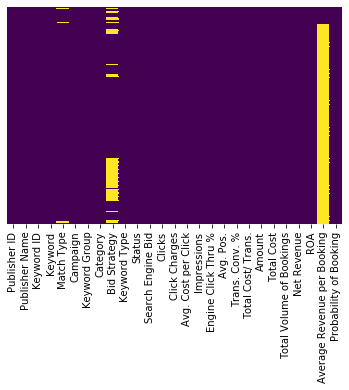

In [21]:
sns.heatmap(AirFrance_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## In the above heatmap we can see that Matct Type , Bid Strategy ,Average Revenue per booking are having missing values. 

In [22]:
AirFrance_df['Bid Strategy'].value_counts()

Position 5-10 Bid Strategy    2208
Position 2-5 Bid Strategy      333
Position 1-2 Target            274
Position 1- 3                  264
Position 1-4 Bid Strategy      111
Pos 3-6                         45
Postiion 1-4 Bid Strategy       40
Position 1 -2 Target            11
Name: Bid Strategy, dtype: int64

In [23]:
AirFrance_df['Match Type'].value_counts()

Broad       2591
Advanced     969
Standard     880
Exact         22
Name: Match Type, dtype: int64

C:\Users\monik\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\monik\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\monik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\monik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


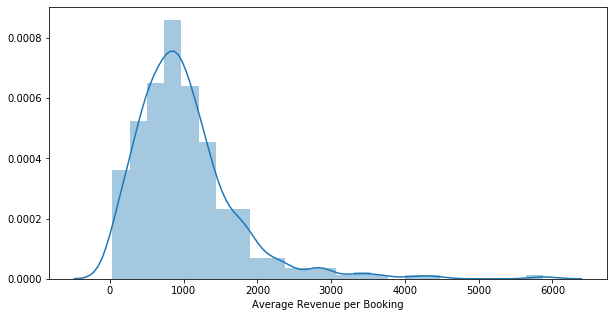

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(AirFrance_df['Average Revenue per Booking'], bins = 25)

# Imputing the missing values for the variables.

### As I have noticed in the above count values of Bid Strategy that maximum Bid Strategy is for “Position 5-10 Bid Strategy” as compared to others. So,  filling the null value of with Position 5-10 Bid Strategy

In [25]:
AirFrance_df['Bid Strategy'] = AirFrance_df['Bid Strategy'].fillna('Position 5-10 Bid Strategy')

### In the above count values of Match Type that maximum Match Type is for “Broad ” as compared to others. So, filling the null value of with Broad 

In [26]:
AirFrance_df['Match Type'] = AirFrance_df['Match Type'].fillna('Broad')

### Average Revenue per Booking is calculated with (Amount /Total Volume of Bookings) and when Total Volume of Bookings is 0, we then set null value for that observation, so it better that we set null values to zero.

In [27]:
AirFrance_df['Average Revenue per Booking'] = AirFrance_df['Average Revenue per Booking'].fillna(0)

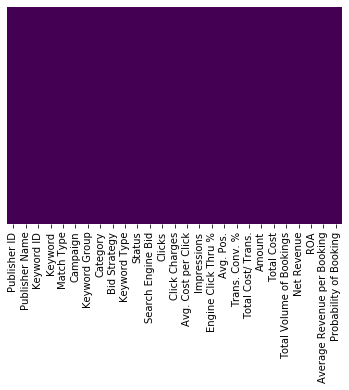

In [28]:
sns.heatmap(AirFrance_df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### 2.  Please conduct regression analysis to study what factors influence the Total Cost. Basically, Total Cost is your dependent variable (Y) and your task is to determine what the important independent (explanatory) variables are. You should use the domain knowledge you have learnt from the case, personal experiences, and external research to guide your variable selections. You may try different set of independent variables in the data set to see which one(s) has significant results and thus support your belief (you may need to create dummy variables for some of the non-numerical variables). Please report 1) the final set of independent variables you have chosen and why you have chosen them; and 2) the estimated regression equation with simple explanations for each estimated coefficient (β) and its associated relationship (include significance, direction of the impact, magnitude of the impact, and justification of the identified relationship). (Hint: feel free to explore the data in any way you want, e.g. correlation matrix, scatter plots, etc.)

In [29]:
AirFrance_df.corr(method="pearson")

,Keyword ID,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
Keyword ID,1.000000,0.093671,-0.025194,-0.031804,0.172528,-0.035015,0.180809,-0.080956,0.039276,-0.048383,0.005132,-0.031804,0.004136,0.008379,0.036019,-0.033330,0.032809
Search Engine Bid,0.093671,1.000000,0.114934,0.113212,0.280368,0.023738,0.147721,-0.267877,0.002874,0.039652,0.107165,0.113212,0.114730,0.101718,-0.005297,-0.009960,0.008993
Clicks,-0.025194,0.114934,1.000000,0.868330,-0.033787,0.400361,-0.014000,-0.021096,0.001533,0.192615,0.830764,0.868330,0.827187,0.789419,0.015593,0.283024,0.002635
Click Charges,-0.031804,0.113212,0.868330,1.000000,0.029171,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,1.000000,0.539573,0.482530,0.003013,0.293301,-0.000769
Avg. Cost per Click,0.172528,0.280368,-0.033787,0.029171,1.000000,-0.016912,0.106898,-0.113344,0.003308,0.058178,-0.047568,0.029171,-0.048201,-0.052634,-0.033836,-0.046970,0.004340
Impressions,-0.035015,0.023738,0.400361,0.431231,-0.016912,1.000000,-0.026821,-0.005288,-0.001338,0.201258,0.104770,0.431231,0.092177,0.069241,-0.000827,0.160957,-0.002120
Engine Click Thru %,0.180809,0.147721,-0.014000,-0.027310,0.106898,-0.026821,1.000000,-0.221802,0.001666,-0.040646,0.008413,-0.027310,0.009194,0.011397,0.000861,-0.042343,0.028059
Avg. Pos.,-0.080956,-0.267877,-0.021096,-0.018533,-0.113344,-0.005288,-0.221802,1.000000,-0.013475,-0.012189,-0.030424,-0.018533,-0.031914,-0.030160,-0.024858,-0.046158,-0.024613
Trans. Conv. %,0.039276,0.002874,0.001533,-0.000401,0.003308,-0.001338,0.001666,-0.013475,1.000000,-0.000528,0.014417,-0.000401,0.017679,0.015157,0.856458,0.096467,0.889333
Total Cost/ Trans.,-0.048383,0.039652,0.192615,0.333614,0.058178,0.201258,-0.040646,-0.012189,-0.000528,1.000000,0.035870,0.333614,0.036950,0.006182,-0.002331,0.358445,-0.002432


## Observation:

multicollinearity was observed between Clicks and Click Charges. We can drop one of the columns for the model <br>
multicollinearity was observed between Amount, Net Revenue,Total Volume of Booking. We can drop two of the columns for the model

# For changing categorical variable to numberical we can use labelEncoder

### According my domain knowledge for this particular dataset based on my learning and research converting keyword, keyword group and searcg engine bid here 

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
AirFrance_df['Keyword'] = le.fit_transform(AirFrance_df['Keyword'])
AirFrance_df['Keyword Group'] = le.fit_transform(AirFrance_df['Keyword Group'])
AirFrance_df['Bid Strategy'] = le.fit_transform(AirFrance_df['Bid Strategy'])
AirFrance_df['Search Engine Bid'] = le.fit_transform(AirFrance_df['Search Engine Bid'])

In [32]:
AirFrance_df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,ROA,Average Revenue per Booking,Probability of Booking
0,K2615,Yahoo - US,43000000039657988,1117,Advanced,Western Europe Destinations,142,uncategorized,6,Unassigned,...,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,975.327778,0.818182
1,K2615,Yahoo - US,43000000039651113,1463,Advanced,Geo Targeted DC,264,uncategorized,6,Unassigned,...,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,1574.200000,0.166667
2,K2003,MSN - Global,43000000019452431,39,Broad,Air France Brand & French Destinations,144,uncategorized,5,Unassigned,...,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,100583.870968,390.150000,0.111111
3,K1175,Google - Global,43000000005663331,2,Exact,Air France Global Campaign,0,airfrance,2,Unassigned,...,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,832.575000,0.004988
4,K1123,Overture - Global,43000000005421354,111,Standard,Unassigned,342,airfrance,3,Unassigned,...,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,42400.000000,935.000000,0.003145


# Start to do regression model

In [33]:
import statsmodels.api as sm

# 1st Attempt

### Including maximum number of the columns from our dataset and not including thoes according to my understanding are not significant for our regression model

In [34]:
indepvar=sm.add_constant(AirFrance_df[['Keyword','Keyword Group','Bid Strategy','Search Engine Bid','Click Charges','Impressions','Engine Click Thru %','Trans. Conv. %','Avg. Pos.','Total Cost/ Trans.','Total Cost/ Trans.','Amount']])

C:\Users\monik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
model_1=sm.OLS(AirFrance_df['Total Cost'],indepvar)
res1=model_1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.266e+31
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        22:44:55   Log-Likelihood:             1.1119e+05
No. Observations:                4510   AIC:                        -2.224e+05
Df Residuals:                    4498   BIC:                        -2.223e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.852e-12   4

### P>|t| column is the p-value , which represents a significance level. p-values for any variable greater than 0.05 is considered as Not significant. Hence we can drop thoes varibles from our model.

# 2nd Attempt

In [36]:
model_2=sm.OLS(AirFrance_df['Total Cost'],AirFrance_df[['Keyword','Keyword Group','Clicks','Impressions', 'Engine Click Thru %','Trans. Conv. %','Total Cost/ Trans.','Amount']])
res2=model_2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:             Total Cost   R-squared (uncentered):                   0.865
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              3615.
Date:                Tue, 05 May 2020   Prob (F-statistic):                        0.00
Time:                        22:44:55   Log-Likelihood:                         -34395.
No. Observations:                4510   AIC:                                  6.881e+04
Df Residuals:                    4502   BIC:                                  6.886e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

#### The condition number is large, 1.23e+04. This might indicate that there are strong multicollinearity or other numerical problems. So the choice of columns is wrong.


# FINAL : 3rd Attempt

In [41]:
varible = ['Keyword','Clicks','Impressions','Total Cost/ Trans.','Amount']

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(AirFrance_df[varible])

In [43]:
indepvar1=sm.add_constant(X_scaled)

In [44]:
model_3=sm.OLS(AirFrance_df['Total Cost'],indepvar1)
res3=model_3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     5657.
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        22:45:28   Log-Likelihood:                -34404.
No. Observations:                4510   AIC:                         6.882e+04
Df Residuals:                    4504   BIC:                         6.886e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.4758      7.412     22.595      0.0

### Interpreting the Regression Results

I highlighted several important components within the results:

1. Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. In this model, the Adj. R-squared value is 86%. 
<br>
<br>
2. const coefficient is Y-intercept. It means that if all the varible's coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
<br>
3. Keyword Group (X1) coefficient represents the change in the output Y due to a change of one unit in the Keyword Group (everything else held constant)
<br>
<br>
4. Clicks (X2) coefficient represents the change in the output Y due to a change of one unit in the Clicks(everything else held constant)
<br>
<br>
5. Impressions (X3) coefficient represents the change in the output Y due to a change of one unit in the Impressions(everything else held constant)
<br>
<br>
6. Total Cost/ Trans.(X4) coefficient represents the change in the output Y due to a change of one unit in the Total Cost/ Trans(everything else held constant)
<br>
<br>
7. Amount.(X4) coefficient represents the change in the output Y due to a change of one unit in the Amount(everything else held constant)
<br>
<br>
8. std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
<br>
<br>
9. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
<br>
<br>
10. Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)